In [1]:
import pandas as pd
import numpy as np
import datetime

In [2]:
music = pd.read_json('../data/mydataspotify/StreamingHistory0.json')

In [3]:
music.shape

(10000, 4)

In [4]:
music2 = pd.read_json('../data/mydataspotify/StreamingHistory1.json')

In [5]:
music2.shape

(6530, 4)

In [6]:
music = pd.concat([music, music2], axis=0, ignore_index=True)

In [7]:
music.shape

(16530, 4)

In [8]:
music.head()

,endTime,artistName,trackName,msPlayed
0,2021-11-12 15:22,Myke Towers,Experimento,106394
1,2021-11-13 08:53,Tame Impala,The Less I Know The Better,3712
2,2021-11-13 08:56,Tame Impala,The Less I Know The Better,213141
3,2021-11-13 09:33,Goth Babe,Canary Islands,3904
4,2021-11-13 09:36,Goth Babe,Canary Islands,201042


In [9]:
music['sgPlayed'] = music['msPlayed']/1000

In [10]:
music['minPlayed'] = music['sgPlayed']/60

In [11]:
nan_cols=music.isna().sum()

nan_cols[nan_cols>0]

Series([], dtype: int64)

In [12]:
music['endTime'] = pd.to_datetime(music['endTime'])

In [13]:
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16530 entries, 0 to 16529
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   endTime     16530 non-null  datetime64[ns]
 1   artistName  16530 non-null  object        
 2   trackName   16530 non-null  object        
 3   msPlayed    16530 non-null  int64         
 4   sgPlayed    16530 non-null  float64       
 5   minPlayed   16530 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 775.0+ KB


In [14]:
music.rename(columns={'endTime':'date'}, inplace=True)

In [15]:
music.set_index('date', inplace=True)

In [16]:
music.loc['Jan 2022' : 'Feb 2022'][:5]

,artistName,trackName,msPlayed,sgPlayed,minPlayed
date,,,,,
2022-01-01 01:47:00,Doja Cat,You Right,186173,186.173,3.102883
2022-01-01 01:51:00,Doja Cat,Say So,237893,237.893,3.964883
2022-01-01 01:54:00,Doja Cat,Cyber Sex,165733,165.733,2.762217
2022-01-01 01:56:00,Doja Cat,Woman,172626,172.626,2.877100
2022-01-01 01:59:00,Doja Cat,Ride,176733,176.733,2.945550


In [17]:
music.between_time('21:00','22:00')[:5]

,artistName,trackName,msPlayed,sgPlayed,minPlayed
date,,,,,
2021-11-13 21:22:00,Myke Towers,Experimento,8150,8.150,0.135833
2021-11-13 21:22:00,ROSALÍA,LA FAMA (with The Weeknd),36061,36.061,0.601017
2021-11-13 21:25:00,Jorja Smith,Home,166425,166.425,2.773750
2021-11-13 21:28:00,Jorja Smith,Home,166425,166.425,2.773750
2021-11-13 21:34:00,Jorja Smith,Bussdown (feat. Shaybo),5418,5.418,0.090300


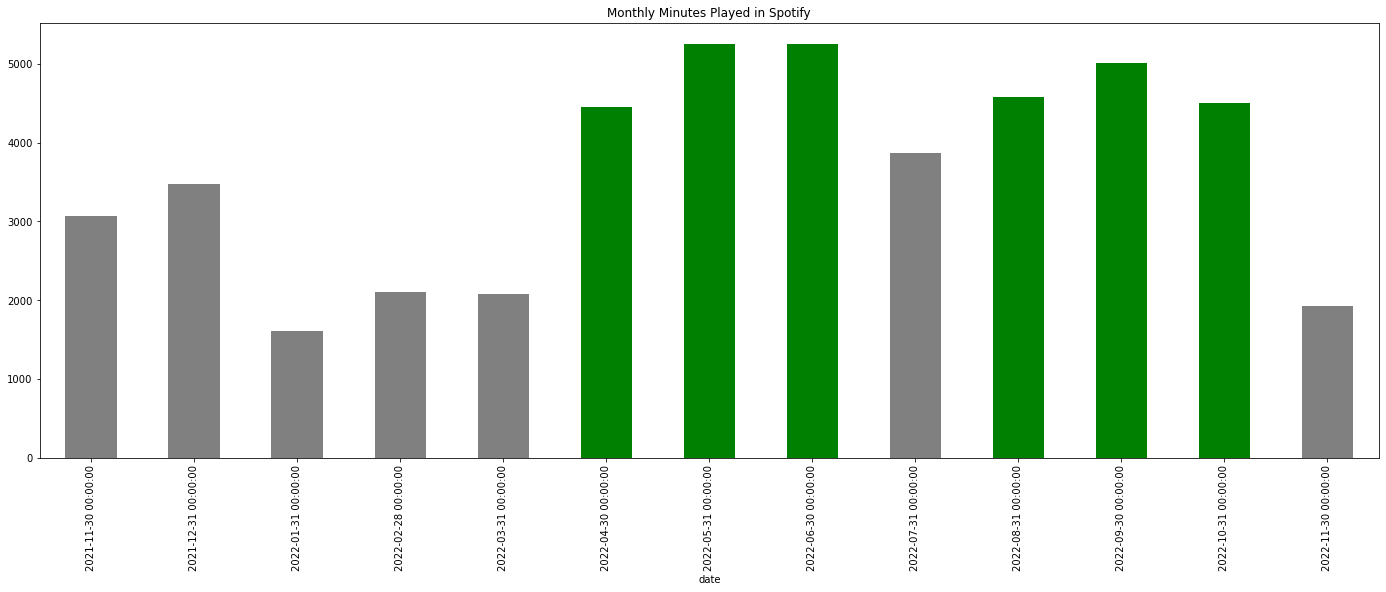

In [18]:
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(24, 8))

profit_color = ['green' if p > 4000 else 'grey' for p in music.resample('M')['minPlayed'].sum()]

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))

music.resample('M')['minPlayed'].sum()\
.plot.bar(color=profit_color, ax=ax, title='Monthly Minutes Played in Spotify');


# Apple

In [19]:
apple = pd.read_csv('../data/apple_health_export/ActiveEnergyBurned.csv')

/var/folders/s4/79ykyqjn7f16bdl_zqjgsbzh0000gp/T/ipykernel_61493/3312075173.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  apple = pd.read_csv('../data/apple_health_export/ActiveEnergyBurned.csv')


In [20]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336135 entries, 0 to 336134
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   sourceName     336135 non-null  object 
 1   sourceVersion  336135 non-null  object 
 2   device         330600 non-null  object 
 3   type           336135 non-null  object 
 4   unit           336135 non-null  object 
 5   creationDate   336135 non-null  object 
 6   startDate      336135 non-null  object 
 7   endDate        336135 non-null  object 
 8   value          336135 non-null  float64
dtypes: float64(1), object(8)
memory usage: 23.1+ MB


In [21]:
apple = apple.astype({'startDate': 'datetime64[ns]','endDate': 'datetime64[ns]'})

In [22]:
#apple['diff'] = apple['endDate'] - apple['startDate']

In [23]:
#apple.tail(50)

In [24]:
#apple['diff'].min()

In [25]:
apple.drop(columns=['sourceName','sourceVersion','device','type','unit', 'creationDate', 'endDate'], inplace= True)

In [26]:
apple.columns = ['date','kcal']

In [27]:
apple['date'] = apple['date'].dt.floor('Min')

In [28]:
apple.loc[apple.date.duplicated(keep=False)][:5]

,date,kcal
1127,2020-12-15 21:30:00,8.0
1142,2020-12-15 21:30:00,8.0
1440,2020-12-30 23:30:00,1.0
1593,2021-01-07 13:50:00,1.0
1834,2020-12-30 23:30:00,1.0


In [29]:
app = apple.groupby(['date'])['kcal'].sum()

In [30]:
apple.loc[apple.date.duplicated(keep=False)][:5]

,date,kcal
1127,2020-12-15 21:30:00,8.0
1142,2020-12-15 21:30:00,8.0
1440,2020-12-30 23:30:00,1.0
1593,2021-01-07 13:50:00,1.0
1834,2020-12-30 23:30:00,1.0


In [31]:
app = pd.DataFrame(app)

In [32]:
app.reset_index(inplace=True)

In [33]:
app.head()

,date,kcal
0,2016-05-28 08:00:00,239.0
1,2020-11-05 13:40:00,1.0
2,2020-11-05 15:30:00,1.0
3,2020-11-05 15:40:00,3.0
4,2020-11-05 15:50:00,2.0


In [34]:
music.reset_index(inplace=True)

In [35]:
music.head()

,date,artistName,trackName,msPlayed,sgPlayed,minPlayed
0,2021-11-12 15:22:00,Myke Towers,Experimento,106394,106.394,1.773233
1,2021-11-13 08:53:00,Tame Impala,The Less I Know The Better,3712,3.712,0.061867
2,2021-11-13 08:56:00,Tame Impala,The Less I Know The Better,213141,213.141,3.552350
3,2021-11-13 09:33:00,Goth Babe,Canary Islands,3904,3.904,0.065067
4,2021-11-13 09:36:00,Goth Babe,Canary Islands,201042,201.042,3.350700


In [36]:
music.shape

(16530, 6)

In [37]:
music2 = music.merge(app, how='left', on= 'date')

In [38]:
music2.kcal.unique()

array([  nan, 1.852, 0.734, ..., 2.709, 4.671, 1.446])

In [39]:
music2.shape

(16530, 7)

In [40]:
nan_cols=music2.isna().sum()

nan_cols[nan_cols>0]

kcal    6558
dtype: int64

In [41]:
music2 = music2.dropna()

In [42]:
music2.shape

(9972, 7)

In [43]:
music2 = music2.reset_index(drop=True)

In [44]:
music2.head()

,date,artistName,trackName,msPlayed,sgPlayed,minPlayed,kcal
0,2021-11-13 10:04:00,The Strokes,You Only Live Once,189227,189.227,3.153783,1.852
1,2021-11-13 10:19:00,ROSALÍA,LA FAMA (with The Weeknd),367373,367.373,6.122883,0.734
2,2021-11-13 11:00:00,Jesse & Joy,Dueles,91830,91.830,1.530500,23.267
3,2021-11-13 11:11:00,Eminem,Without Me,317503,317.503,5.291717,17.610
4,2021-11-13 11:41:00,Jorja Smith,Bussdown (feat. Shaybo),152850,152.850,2.547500,16.181


In [45]:
music2.groupby(['artistName'])['kcal'].agg

<bound method SeriesGroupBy.aggregate of <pandas.core.groupby.generic.SeriesGroupBy object at 0x7fc7bc3fcdc0>>

In [46]:
music2.loc[music2['kcal'] == music2['kcal'].max()]

,date,artistName,trackName,msPlayed,sgPlayed,minPlayed,kcal
2766,2022-05-06 19:07:00,Daddy Yankee,RUMBATÓN,244155,244.155,4.06925,33.084


In [47]:
music2.sort_values(by=['kcal'], ascending=False)[:10]

,date,artistName,trackName,msPlayed,sgPlayed,minPlayed,kcal
2766,2022-05-06 19:07:00,Daddy Yankee,RUMBATÓN,244155,244.155,4.069250,33.084
89,2021-11-18 14:34:00,Hannah Montana,Ordinary Girl,177506,177.506,2.958433,31.657
87,2021-11-18 14:08:00,Sabrina Carpenter,Skin,177500,177.500,2.958333,29.808
157,2021-11-28 13:35:00,Matthias Tanzmann,Masina,84121,84.121,1.402017,28.649
156,2021-11-28 13:35:00,Nicki Nicole,Sabe,29300,29.300,0.488333,28.649
267,2021-12-16 11:58:00,Tiago PZK,Salimo de Noche,105093,105.093,1.751550,27.363
2767,2022-05-06 19:12:00,Quevedo,Piel de Cordero,210830,210.830,3.513833,27.290
749,2022-01-26 20:09:00,Tiago PZK,Entre Nosotros (Remix) [con Nicki Nicole],260000,260.000,4.333333,25.992
88,2021-11-18 14:19:00,Madison Beer,Home with You,190576,190.576,3.176267,25.783
187,2021-11-29 20:44:00,Loui,Talkin' Bout (feat. Saweetie),126225,126.225,2.103750,25.768


In [57]:
suma = music2.groupby(['artistName'])['kcal'].sum()

In [67]:
suma = pd.DataFrame(suma)

In [70]:
suma.reset_index(drop=False, inplace=True)

In [71]:
suma.head()

,artistName,kcal
0,070 Shake,0.312
1,102 Boyz,10.000
2,2 VIVE,0.437
3,2021 Wrapped,0.253
4,2Pac,3.254


In [72]:
suma.loc[suma['artistName'] == 'Quevedo']

,artistName,kcal
1501,Quevedo,166.214


In [75]:
suma.sort_values(by=['kcal'], ascending=False)[:10]

,artistName,kcal
1508,ROSALÍA,307.894
163,Bad Bunny,266.390
206,Beyoncé,182.794
1501,Quevedo,166.214
1515,Rauw Alejandro,164.763
1031,Labrinth,133.718
61,Alicia Keys,126.274
478,David Guetta,120.670
631,Feid,111.691
1287,Mora,99.856


In [76]:
sumacan = music2.groupby(['trackName'])['kcal'].sum()

In [77]:
sumacan = pd.DataFrame(sumacan)

In [78]:
sumacan.reset_index(drop=False, inplace=True)

In [79]:
sumacan.sort_values(by=['kcal'], ascending=False)[:10]

,trackName,kcal
2817,Piel de Cordero,61.715
1918,La Bachata,57.330
1895,LA COMBI VERSACE,55.104
2682,Ordinary Girl,53.974
1701,I'm Good (Blue),50.559
3233,Sistema De Patio,50.286
2564,Normal,45.943
1065,ESCALOFRÍOS,45.186
43,2/Catorce,44.781
3203,Si Tú Te Vas (feat. Yung Beef) - Remix,42.777


In [81]:
music2.loc[music2['trackName'] == 'Ordinary Girl']

,date,artistName,trackName,msPlayed,sgPlayed,minPlayed,kcal
89,2021-11-18 14:34:00,Hannah Montana,Ordinary Girl,177506,177.506,2.958433,31.657
189,2021-11-29 21:09:00,Hannah Montana,Ordinary Girl,99570,99.570,1.659500,15.305
217,2021-12-07 14:09:00,Hannah Montana,Ordinary Girl,177506,177.506,2.958433,6.333
784,2022-01-28 09:49:00,Hannah Montana,Ordinary Girl,177507,177.507,2.958450,0.172
880,2022-02-02 18:46:00,Hannah Montana,Ordinary Girl,177506,177.506,2.958433,0.115
997,2022-02-06 19:39:00,Hannah Montana,Ordinary Girl,176437,176.437,2.940617,0.189
1565,2022-03-24 19:32:00,Hannah Montana,Ordinary Girl,177507,177.507,2.958450,0.136
3124,2022-05-17 08:52:00,Hannah Montana,Ordinary Girl,177507,177.507,2.958450,0.067


In [82]:
apple.loc[apple['date'] == '2021-11-18 14:34:00']

,date,kcal
88439,2021-11-18 14:34:00,31.657
